In [1]:
import seaborn as sns

from fairness_experiments import concat_results

### Carrega o conjunto de resultados

In [7]:
res = concat_results(relative_dir='resultados_teste/', file_format='.csv', sep=';')
res

,dataset,preprocessing,clf_type,params,accuracy,dif_accuracy,balanced_accuracy,dif_balanced_accuracy,recall,dif_recall,precision,dif_precision,fpr,dif_fpr,selection_rate,dif_selection_rate,dif_statistical_parity,dif_equal_opp,dif_avg_odds,disparate_impacto_ratio
0,German,sem pré-processamento,Random Forest,{'n_estimators': 120},0.767,0.061162,0.660238,0.096682,0.927143,0.045237,0.781563,0.057985,0.606667,0.171130,0.831,0.085442,0.085442,0.045237,0.086585,0.908721
1,German,sem pré-processamento,Random Forest,{'n_estimators': 140},0.761,0.065032,0.651190,0.071734,0.925714,0.040292,0.776474,0.069508,0.623333,0.151493,0.835,0.095288,0.095288,0.040292,0.092863,0.909864
2,German,sem pré-processamento,Random Forest,{'n_estimators': 160},0.763,0.062292,0.654524,0.078574,0.925714,0.048262,0.778949,0.061262,0.616667,0.149439,0.833,0.093469,0.093469,0.048262,0.078190,0.922804
3,German,sem pré-processamento,Random Forest,{'n_estimators': 180},0.761,0.044958,0.653095,0.062957,0.922857,0.029183,0.778543,0.057488,0.616667,0.141482,0.831,0.088993,0.088993,0.029183,0.083447,0.921169
4,German,sem pré-processamento,Random Forest,{'n_estimators': 200},0.765,0.069264,0.661667,0.079645,0.920000,0.039689,0.783117,0.070136,0.596667,0.135028,0.823,0.073747,0.073747,0.039689,0.070802,0.919194
5,German,sem pré-processamento,Naive Bayes,{},0.630,0.073140,0.605238,0.085483,0.667143,0.090561,0.784559,0.109373,0.456667,0.175588,0.604,0.089506,0.089506,0.090561,0.095734,0.967596
6,German,sem pré-processamento,Decision Tree,"{'criterion': 'gini', 'splitter': 'best'}",0.701,0.094385,0.647381,0.077293,0.781429,0.107498,0.790991,0.073700,0.486667,0.102039,0.693,0.093297,0.093297,0.107498,0.069232,0.943909
7,German,sem pré-processamento,Decision Tree,"{'criterion': 'gini', 'splitter': 'random'}",0.680,0.099700,0.622857,0.124036,0.765714,0.125266,0.775317,0.086080,0.520000,0.195937,0.692,0.109048,0.109048,0.125266,0.105089,0.923053
8,German,sem pré-processamento,Decision Tree,"{'criterion': 'entropy', 'splitter': 'best'}",0.696,0.107346,0.641905,0.121558,0.777143,0.114832,0.787330,0.136550,0.493333,0.206381,0.692,0.086767,0.086767,0.114832,0.103137,0.998164
9,German,sem pré-processamento,Decision Tree,"{'criterion': 'entropy', 'splitter': 'random'}",0.684,0.076336,0.624762,0.118754,0.772857,0.135768,0.775556,0.073081,0.523333,0.237941,0.698,0.133895,0.133895,0.135768,0.142386,0.926852


### Agrupa resultados por dataset, pré-processamento e clf_type

In [3]:
# incluir style.format("{:.2%}") para mostrar em porcentagem
res.groupby(by=['dataset', 'preprocessing', 'clf_type']).mean().style.format("{:.2%}")

### Agrupa resultados por dataset, pré-processamento

In [4]:
# incluir style.format("{:.2%}") para mostrar em porcentagem
res.groupby(by=['dataset', 'preprocessing']).mean().style.format("{:.2%}")

,,accuracy,dif_accuracy,balanced_accuracy,dif_balanced_accuracy,recall,dif_recall,precision,dif_precision,fpr,dif_fpr,selection_rate,dif_selection_rate,dif_statistical_parity,dif_equal_opp,dif_avg_odds,disparate_impacto_ratio
dataset,preprocessing,,,,,,,,,,,,,,,,
German,sem pré-processamento,71.44%,7.41%,63.89%,8.91%,82.77%,7.76%,77.96%,7.69%,55.00%,16.24%,74.44%,9.47%,9.47%,7.76%,9.24%,92.03%


### Visualizações (Seaborn)

/home/diego/Documentos/Projetos Python/env/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/diego/Documentos/Projetos Python/env/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


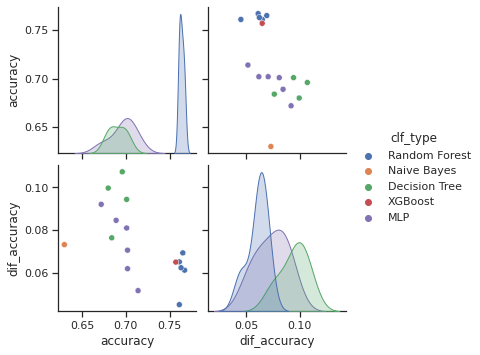

In [5]:
sns.set_theme(style="ticks")

columns = ['clf_type', 'accuracy', 'dif_accuracy']
sns.pairplot(res[columns], hue="clf_type")

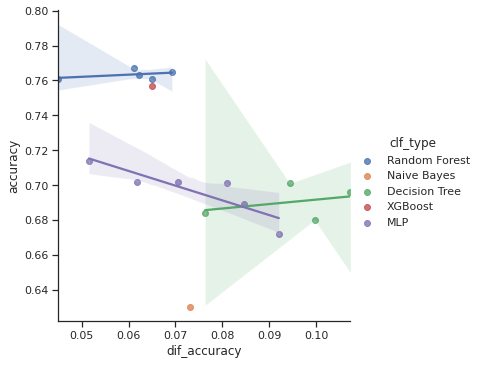

In [6]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="dif_accuracy", y="accuracy", hue="clf_type", data=res[columns])